In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def manual_histogram_equalization(image):
    hist,_ =np.histogram(image.flatten(), bins=256, range=[0, 256])
    cdf=hist.cumsum()
    
    cdf_normalized=(cdf-cdf.min())*255/(cdf.max()-cdf.min())
    cdf_normalized=cdf_normalized.astype(np.uint8)
    
    img_equalized=cdf_normalized[image]
    return img_equalized, hist, np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])[0]

In [14]:
f=cv.imread(r"a1images\a1images\shells.tif", cv.IMREAD_GRAYSCALE)
if f is None:
    raise FileNotFoundError("Image not found! Check the path.")


In [20]:
g,hist_before,hist_after=manual_histogram_equalization(f)

(0.0, 255.0)

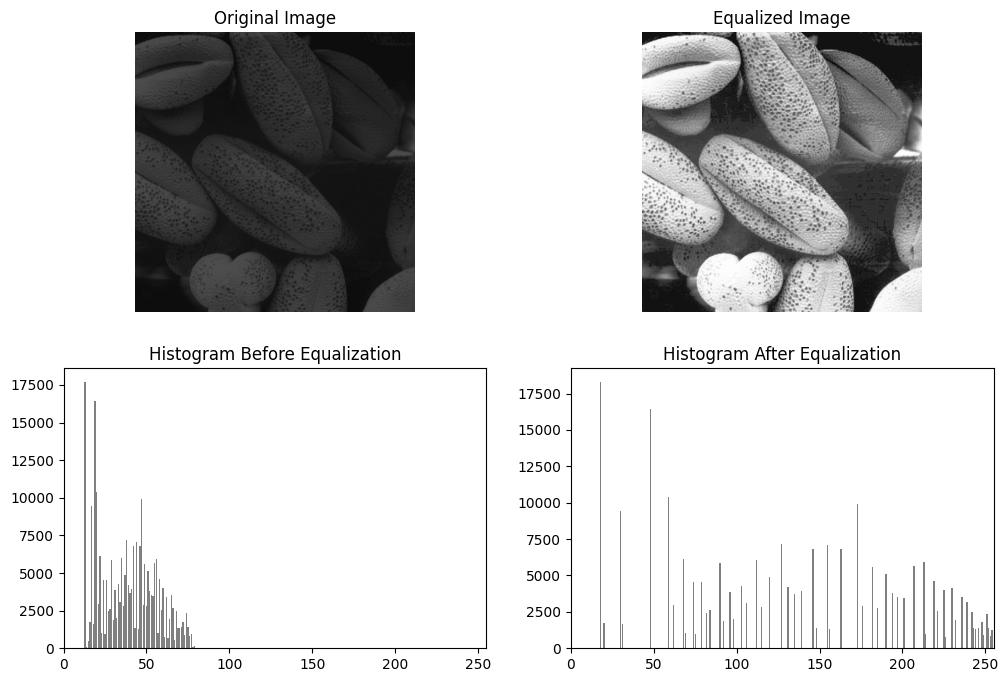

In [22]:
fig,axs=plt.subplots(2,2,figsize=(12,8))
axs[0,0].imshow(f, cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')

axs[0,1].imshow(g, cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title('Equalized Image')
axs[0,1].axis('off')

axs[1,0].bar(range(256), hist_before, color='gray')
axs[1,0].set_title('Histogram Before Equalization')
axs[1,0].set_xlim([0,255])

axs[1,1].bar(range(256), hist_after, color='gray')
axs[1,1].set_title('Histogram After Equalization')
axs[1,1].set_xlim([0,255])

